### PREGUNTA 1

Considere las siguientes variables aleatorias  
1. $X ∼ b(x; n, p)$. Seleccione valores para $n, p$.
2. $Y ∼ exp(x; λ)$. Seleccione un valor para  $λ$.
        
Para cada variable aleatoria genere una muestra aleatoria de tamaño 150 y realizar el siguiente procedimiento:
        
1.  Construir, según el caso, un histograma de masa o densidad y, en un mismo
        gráfico, compararlo con la función de probabilidad teórica.
2.  Calcular el promedio, los cuartiles y la desviación estándar. Comparar los
        valores obtenidos con los valores teóricos.

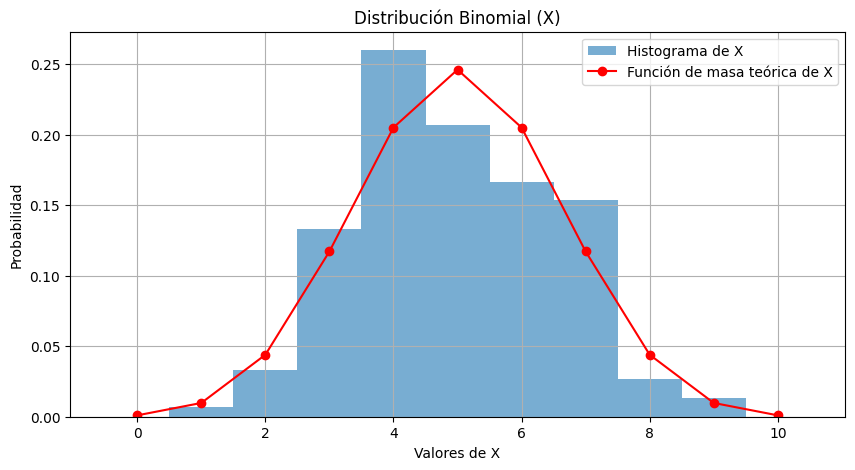

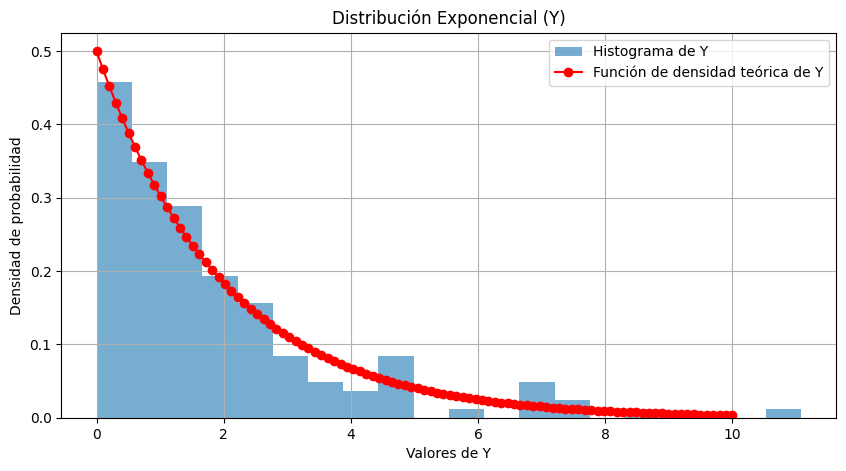

Estadísticas descriptivas para X:
Promedio: 4.953333333333333
Cuartil 1: 4.0
Cuartil 2 (Mediana): 5.0
Cuartil 3: 6.0
Desviación estándar: 1.559216327375889

Estadísticas descriptivas para Y:
Promedio: 1.847477007587668
Cuartil 1: 0.4909112390854311
Cuartil 2 (Mediana): 1.2033618469522818
Cuartil 3: 2.4843585372805252
Desviación estándar: 1.9099477470118105


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, expon

# Parámetros para la distribución binomial
n = 10  # Valor para n
p = 0.5  # Valor para p

# Parámetro para la distribución exponencial
lambda_param = 0.5  # Valor para lambda

# Generar muestras aleatorias para X (distribución binomial) y Y (distribución exponencial)
sample_size = 150
X_samples = np.random.binomial(n, p, sample_size)
Y_samples = np.random.exponential(scale=1/lambda_param, size=sample_size)

# Histograma y función de masa de X
plt.figure(figsize=(10, 5))
plt.hist(X_samples, bins=np.arange(n+2)-0.5, density=True, alpha=0.6, label='Histograma de X')
x_values = np.arange(0, n+1)
plt.plot(x_values, binom.pmf(x_values, n, p), 'ro-', label='Función de masa teórica de X')
plt.xlabel('Valores de X')
plt.ylabel('Probabilidad')
plt.title('Distribución Binomial (X)')
plt.legend()
plt.grid(True)
plt.show()

# Histograma y función de densidad de Y
plt.figure(figsize=(10, 5))
plt.hist(Y_samples, bins=20, density=True, alpha=0.6, label='Histograma de Y')
y_values = np.linspace(0, 10, 100)
plt.plot(y_values, expon.pdf(y_values, scale=1/lambda_param), 'ro-', label='Función de densidad teórica de Y')
plt.xlabel('Valores de Y')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Exponencial (Y)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular estadísticas descriptivas para X
X_mean = np.mean(X_samples)
X_q1, X_q2, X_q3 = np.percentile(X_samples, [25, 50, 75])
X_std = np.std(X_samples)

print("Estadísticas descriptivas para X:")
print("Promedio:", X_mean)
print("Cuartil 1:", X_q1)
print("Cuartil 2 (Mediana):", X_q2)
print("Cuartil 3:", X_q3)
print("Desviación estándar:", X_std)

# Calcular estadísticas descriptivas para Y
Y_mean = np.mean(Y_samples)
Y_q1, Y_q2, Y_q3 = np.percentile(Y_samples, [25, 50, 75])
Y_std = np.std(Y_samples)

print("\nEstadísticas descriptivas para Y:")
print("Promedio:", Y_mean)
print("Cuartil 1:", Y_q1)
print("Cuartil 2 (Mediana):", Y_q2)
print("Cuartil 3:", Y_q3)
print("Desviación estándar:", Y_std)